In [1]:
import __init__
import os 
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import utilities
from __init__ import DATA_PATH, PACKAGE_PATH
from descriptor import rdkitDescriptors
%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))
df['cleaned_bod'] = utilities.clean_out_of_bound(df['value (% BOD)'])

## 1 Divide the feature columns by dtypes (float and int)

### 1.1 int features

In [3]:
feat_int = rdkitDescriptors.batch_compute_all_descriptors(df['SMILES'],desc_type='int')
selected_int_feat = feat_int.loc[:,feat_int.nunique()>1]
len(selected_int_feat.loc[0])

59

### 1.2 float features

In [4]:
feat_float = rdkitDescriptors.batch_compute_all_descriptors(df['SMILES'],desc_type='float')
selected_float_feat = feat_float.loc[:,feat_float.nunique()>1]
len(selected_float_feat.loc[0])

68

### 1.3 int+float

In [5]:
feat_all = rdkitDescriptors.batch_compute_all_descriptors(df['SMILES'],desc_type='all')
selected_all_feat = feat_all.loc[:,feat_all.nunique()>1]
len(selected_all_feat.loc[0])

127

### 1.4 RdkitFingerprints

In [6]:
fps = rdkitDescriptors.(df['SMILES'])

SyntaxError: invalid syntax (<ipython-input-6-a2c6042e7a3d>, line 1)

## 2 Divide BOD by different cutoff

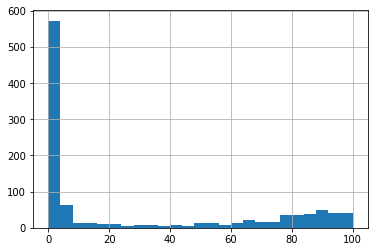

In [7]:
df['cleaned_bod'].hist(bins=25)

### 2.1 50% quantile two classes

(array([535.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 528.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

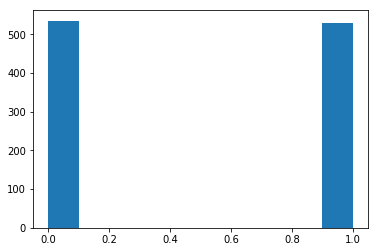

In [8]:
df['bi_class_q50'] = pd.qcut(df['cleaned_bod'].values, 2, labels=[0,1])
true_label_q50 = df['bi_class_q50'].values
plt.hist(true_label_q50)

### 2.2 33%, 66% quantile 3 classes (manual implement due to duplicate edges)

(array([413.,   0.,   0.,   0.,   0., 288.,   0.,   0.,   0., 362.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

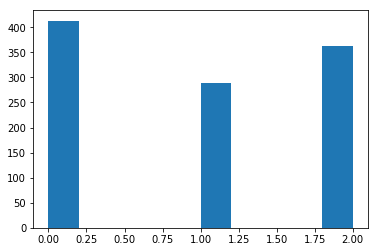

In [9]:
tri_cuts = df['cleaned_bod'].quantile([0.33,0.66]).values
df['tri_class_q33'] = utilities.divide_classes(df['cleaned_bod'], tri_cuts)
true_label_q33 = df['tri_class_q33'].values
plt.hist(true_label_q33)

### 2.3 25%, 50%, 75% 4 classes (manual)

(array([413.,   0.,   0., 122.,   0.,   0., 262.,   0.,   0., 266.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

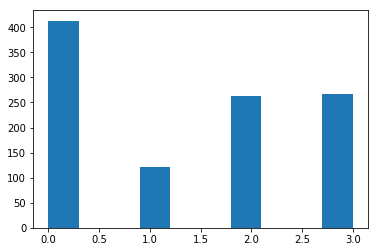

In [10]:
quart_cuts = df['cleaned_bod'].quantile([0.25,0.50,0.75]).values
df['quart_class_q25'] = utilities.divide_classes(df['cleaned_bod'], quart_cuts)
true_label_q25 = df['quart_class_q25'].values
plt.hist(true_label_q25) #inbalanced

### 2.4 Partitioning into bi classes based on distribution

(array([756.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 307.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

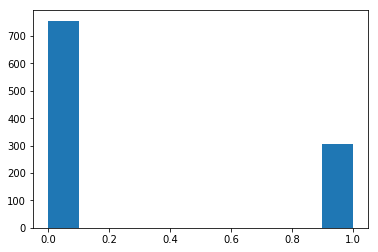

In [11]:
df['bi_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [60])
true_label_biclass = df['bi_class_partition'].values
plt.hist(df['bi_class_partition'])

### 2.5 Partitioning into three classes (poor, median, good) based on distribution

(array([673.,   0.,   0.,   0.,   0., 191.,   0.,   0.,   0., 199.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

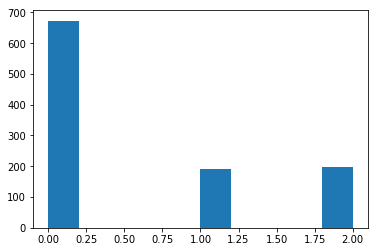

In [12]:
df['tri_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [20,80])
true_label_triclass = df['tri_class_partition'].values
plt.hist(df['tri_class_partition'])

## 3 Baseline Model -- Kmeans

In [13]:
from cluster import KMeans

Using TensorFlow backend.


## 3.1 bi-class 50 quantile cluster

### 3.1.1 int feature

In [14]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.bulid_kmeans_cluster()
kmeans_cluster.train_model(selected_int_feat.values, true_labels=true_label_q50)

Metrics without ture labels
silhouette score: 0.5610915852077762
calinski score: 662.2478576744735

Metric with True label
adjusted rand score: 0.004520889093854531 
fowlkes_mallows : 0.621346420315226


(array([0, 0, 0, ..., 1, 0, 0], dtype=int32),
 {'silhouette_score': 0.5610915852077762,
  'calinski_score': 662.2478576744735,
  'adjusted_rand_score': 0.004520889093854531,
  'fowlkes_mallows_score': 0.621346420315226})

(array([921.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

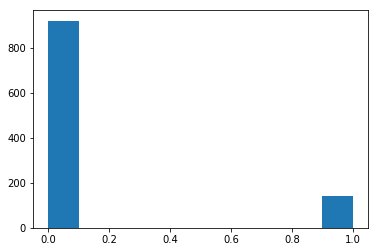

In [15]:
plt.hist(kmeans_cluster.model.labels_)

### 3.1.2 float feature

In [16]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.bulid_kmeans_cluster()
kmeans_cluster.train_model(selected_float_feat.values, true_labels=true_label_q50)

Metrics without ture labels
silhouette score: 0.9772635201713795
calinski score: 2453.85631403476

Metric with True label
adjusted rand score: -2.4617415490710395e-05 
fowlkes_mallows : 0.7061152060370829


(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 {'silhouette_score': 0.9772635201713795,
  'calinski_score': 2453.85631403476,
  'adjusted_rand_score': -2.4617415490710395e-05,
  'fowlkes_mallows_score': 0.7061152060370829})

(array([1.062e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

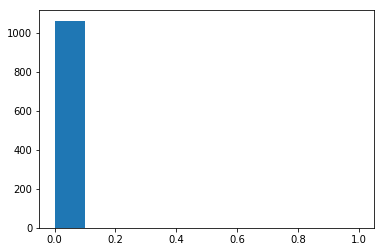

In [17]:
plt.hist(kmeans_cluster.model.labels_)

### 3.1.3 with normalization on features

In [18]:
from keras.utils import normalize
selected_float_feat_norm = normalize(selected_float_feat.values, axis=0, order=2)

In [19]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.bulid_kmeans_cluster()
kmeans_cluster.train_model(selected_float_feat_norm, true_labels=true_label_q50)

Metrics without ture labels
silhouette score: 0.3395621309170745
calinski score: 142.46901685006003

Metric with True label
adjusted rand score: 0.0010426783754876891 
fowlkes_mallows : 0.5888401083971747


(array([1, 1, 1, ..., 0, 0, 1], dtype=int32),
 {'silhouette_score': 0.3395621309170745,
  'calinski_score': 142.46901685006003,
  'adjusted_rand_score': 0.0010426783754876891,
  'fowlkes_mallows_score': 0.5888401083971747})

(array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 862.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

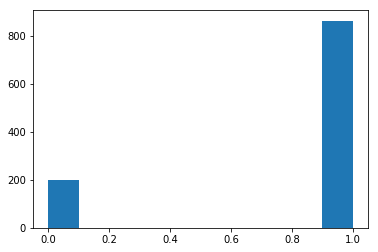

In [20]:
plt.hist(kmeans_cluster.model.labels_)

### 3.1.3 All

In [21]:
selected_all_feat_norm = normalize(selected_all_feat.values, axis=0, order=2)
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.bulid_kmeans_cluster()
kmeans_cluster.train_model(selected_all_feat_norm, true_labels=true_label_q50)

Metrics without ture labels
silhouette score: 0.33918579116507447
calinski score: 103.57096065288427

Metric with True label
adjusted rand score: 0.0013784645403367229 
fowlkes_mallows : 0.5929902134511599


(array([0, 1, 1, ..., 0, 1, 1], dtype=int32),
 {'silhouette_score': 0.33918579116507447,
  'calinski_score': 103.57096065288427,
  'adjusted_rand_score': 0.0013784645403367229,
  'fowlkes_mallows_score': 0.5929902134511599})

## 3.2 Comparison between different cuts

1. bi-class 50 quantile cluster
2. tri-class 33 quantile cluster
3. quart-class 25 quantile cluster
4. bi-class with customed partition \[0,60\%\], (60\%,100\%\]
5. tri-class with customed partition \[0,20\%\], (20\%,80\%\], (80\%,100\%\]

In [22]:
n_clusters   = [2, 3, 4, 2, 3]
true_labels  = [true_label_q50, true_label_q33, true_label_q25, true_label_biclass, true_label_triclass]
cluster_name = ['bi_class_50_quantile', 'tri_class_33_quantile', 
                'quart_class_25_quantile', 'bi_class_customed_partition','tri_class_customed_partition']

### 3.2.1 int feature

In [23]:
kmeans_cluster = KMeans(n_clusters=2)
metrics = []
for i in range(len(n_clusters)):
    kmeans_cluster.n_clusters = n_clusters[i]
    kmeans_cluster.bulid_kmeans_cluster()
    a, metric = kmeans_cluster.train_model(selected_int_feat.values, 
                                           true_labels=true_labels[i],
                                           print_metric=False)
    metrics.append(metric)

int_metrics_df = pd.DataFrame(columns=metrics[0].keys())
int_metrics_df['clusters'] = cluster_name
int_metrics_df = int_metrics_df.set_index('clusters')

for i in range(len(metrics)):
    int_metrics_df.loc[cluster_name[i]] = pd.Series(metrics[i])

int_metrics_df

silhouette_score calinski_score  \
clusters                                                       
bi_class_50_quantile                 0.561092        662.248   
tri_class_33_quantile                0.336812        524.598   
quart_class_25_quantile               0.32851        481.518   
bi_class_customed_partition          0.563177        662.269   
tri_class_customed_partition         0.336812        524.598   

                             adjusted_rand_score fowlkes_mallows_score  
clusters                                                                
bi_class_50_quantile                  0.00452089              0.621346  
tri_class_33_quantile                  0.0182244              0.428058  
quart_class_25_quantile                 0.022595              0.383408  
bi_class_customed_partition            0.0090593              0.676849  
tri_class_customed_partition           -0.011541              0.483427

### 3.2.1 float feature

In [24]:
kmeans_cluster = KMeans(n_clusters=2)
metrics = []
for i in range(len(n_clusters)):
    kmeans_cluster.n_clusters = n_clusters[i]
    kmeans_cluster.bulid_kmeans_cluster()
    a, metric = kmeans_cluster.train_model(selected_float_feat_norm, 
                                           true_labels=true_labels[i],
                                           print_metric=False)
    metrics.append(metric)

float_metrics_df = pd.DataFrame(columns=metrics[0].keys())
float_metrics_df['clusters'] = cluster_name
float_metrics_df = float_metrics_df.set_index('clusters')

for i in range(len(metrics)):
    float_metrics_df.loc[cluster_name[i]] = pd.Series(metrics[i])

float_metrics_df

silhouette_score calinski_score  \
clusters                                                       
bi_class_50_quantile                 0.339562        142.469   
tri_class_33_quantile                0.332421        125.231   
quart_class_25_quantile              0.263934        109.747   
bi_class_customed_partition          0.339562        142.469   
tri_class_customed_partition          0.33536         125.23   

                             adjusted_rand_score fowlkes_mallows_score  
clusters                                                                
bi_class_50_quantile                  0.00104268               0.58884  
tri_class_33_quantile                 0.00281395              0.485468  
quart_class_25_quantile               0.00711927              0.400536  
bi_class_customed_partition           -0.0323044              0.627035  
tri_class_customed_partition           -0.030255               0.55604

In [25]:
kmeans_cluster = KMeans(n_clusters=2)
metrics = []
for i in range(len(n_clusters)):
    kmeans_cluster.n_clusters = n_clusters[i]
    kmeans_cluster.bulid_kmeans_cluster()
    a, metric = kmeans_cluster.train_model(selected_all_feat_norm, 
                                           true_labels=true_labels[i],
                                           print_metric=False)
    metrics.append(metric)

all_metrics_df = pd.DataFrame(columns=metrics[0].keys())
all_metrics_df['clusters'] = cluster_name
all_metrics_df = all_metrics_df.set_index('clusters')

for i in range(len(metrics)):
    all_metrics_df.loc[cluster_name[i]] = pd.Series(metrics[i])
    
all_metrics_df

silhouette_score calinski_score  \
clusters                                                       
bi_class_50_quantile                 0.332934        103.499   
tri_class_33_quantile                0.334281        88.3009   
quart_class_25_quantile              0.288409        82.1561   
bi_class_customed_partition          0.339319         103.51   
tri_class_customed_partition         0.319462        88.2283   

                             adjusted_rand_score fowlkes_mallows_score  
clusters                                                                
bi_class_50_quantile                  0.00135727              0.587983  
tri_class_33_quantile                 0.00717116              0.492177  
quart_class_25_quantile               0.00536488              0.441535  
bi_class_customed_partition           -0.0392128               0.62902  
tri_class_customed_partition          -0.0386494              0.541928

In [26]:
float_metrics_df

silhouette_score calinski_score  \
clusters                                                       
bi_class_50_quantile                 0.339562        142.469   
tri_class_33_quantile                0.332421        125.231   
quart_class_25_quantile              0.263934        109.747   
bi_class_customed_partition          0.339562        142.469   
tri_class_customed_partition          0.33536         125.23   

                             adjusted_rand_score fowlkes_mallows_score  
clusters                                                                
bi_class_50_quantile                  0.00104268               0.58884  
tri_class_33_quantile                 0.00281395              0.485468  
quart_class_25_quantile               0.00711927              0.400536  
bi_class_customed_partition           -0.0323044              0.627035  
tri_class_customed_partition           -0.030255               0.55604

In [27]:
int_metrics_df

silhouette_score calinski_score  \
clusters                                                       
bi_class_50_quantile                 0.561092        662.248   
tri_class_33_quantile                0.336812        524.598   
quart_class_25_quantile               0.32851        481.518   
bi_class_customed_partition          0.563177        662.269   
tri_class_customed_partition         0.336812        524.598   

                             adjusted_rand_score fowlkes_mallows_score  
clusters                                                                
bi_class_50_quantile                  0.00452089              0.621346  
tri_class_33_quantile                  0.0182244              0.428058  
quart_class_25_quantile                 0.022595              0.383408  
bi_class_customed_partition            0.0090593              0.676849  
tri_class_customed_partition           -0.011541              0.483427